<a href="https://colab.research.google.com/github/AnshuKamath/DB-Analytics-Assignment/blob/main/Section2_Python_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Section 2: Bookstore Management Information System
# Optimizing Operations and Customer Engagement through Data Analytics

In [1]:
# Part 1: Importing and Combining Data

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Step 1: Import the "bookstore_transactions.csv" data
print("Step 1: Importing the dataset...")
try:
    # Try to import from local file
    bookstore_data = pd.read_csv("bookstore_transactions.csv")
    print("Dataset loaded successfully from local file.")
except FileNotFoundError:
    # If file not found, try GitHub URL
    print("Local file not found. Attempting to load from GitHub...")
    github_url = "https://raw.githubusercontent.com/AnshuKamath/DB-Analytics-Assignment/main/bookstore_transactions.csv"
    try:
        bookstore_data = pd.read_csv(github_url)
        print("Dataset loaded successfully from GitHub.")
    except:
        print("Error: Could not load dataset from GitHub either.")
        # Create a small sample dataset for demonstration purposes
        print("Creating sample dataset for demonstration...")
        bookstore_data = pd.DataFrame({
            'transaction_id': range(1, 101),
            'customer_id': np.random.randint(1, 501, 100),
            'book_id': np.random.randint(1, 1001, 100),
            'purchase_date': pd.date_range(start='2023-01-01', periods=100),
            'purchase_location': np.random.choice(['In-Store', 'Online'], 100),
            'quantity': np.random.randint(1, 6, 100),
            'unit_price': np.random.uniform(10, 50, 100),
            'payment_method': np.random.choice(['Cash', 'Card', 'Online'], 100),
            'loyalty_points_earned': np.random.randint(0, 500, 100),
            'promotional_offer': np.random.choice(['None', 'Buy One Get One Free', '50% Discount', 'Double Points'], 100)
        })
        print("Sample dataset created.")

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(f"Number of rows: {bookstore_data.shape[0]}")
print(f"Number of columns: {bookstore_data.shape[1]}")

# Display the first few rows to verify data import
print("\nFirst 5 rows of the dataset:")
print(bookstore_data.head())

# Display the column names
print("\nColumn names in the dataset:")
print(bookstore_data.columns.tolist())

# Check data types
print("\nData types of each column:")
print(bookstore_data.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(bookstore_data.isnull().sum())

# Step 2: Combine multiple data files (if available)
# Note: In a real scenario, multiple related files would be imported and combined
# For demonstration, we'll simulate this by creating additional dataframes

print("\nStep 2: Combining multiple data files...")

# Check if we have already combined data
if 'combined_data' not in locals():
    try:
        # Try to load additional related files (if they exist)
        # These would be files like customer_data.csv, book_inventory.csv, etc.
        try:
            customer_data = pd.read_csv("customer_data.csv")
            print("Customer data loaded successfully.")
        except FileNotFoundError:
            # Create sample customer data
            print("Customer data file not found. Creating sample customer data...")
            customer_ids = np.unique(bookstore_data['customer_id'].dropna().astype(int).values)
            customer_data = pd.DataFrame({
                'customer_id': customer_ids,
                'customer_name': ['Customer_' + str(id) for id in customer_ids],
                'email': ['customer' + str(id) + '@example.com' for id in customer_ids],
                'registration_date': pd.date_range(start='2020-01-01', periods=len(customer_ids)),
                'is_member': np.random.choice([True, False], len(customer_ids))
            })

        try:
            book_data = pd.read_csv("book_inventory.csv")
            print("Book inventory data loaded successfully.")
        except FileNotFoundError:
            # Create sample book data
            print("Book inventory file not found. Creating sample book data...")
            book_ids = np.unique(bookstore_data['book_id'].dropna().astype(int).values)
            book_data = pd.DataFrame({
                'book_id': book_ids,
                'title': ['Book_' + str(id) for id in book_ids],
                'author': ['Author_' + str(np.random.randint(1, 100)) for _ in book_ids],
                'genre': np.random.choice(['Fiction', 'Non-Fiction', 'Science', 'History', 'Biography'], len(book_ids)),
                'price': np.random.uniform(10, 50, len(book_ids)),
                'stock': np.random.randint(0, 100, len(book_ids))
            })

        # Combine the dataframes
        # We'll merge them based on common keys
        # First, merge transaction data with customer data
        print("Combining transaction data with customer data...")
        if 'customer_id' in bookstore_data.columns and 'customer_id' in customer_data.columns:
            combined_data = pd.merge(
                bookstore_data,
                customer_data,
                on='customer_id',
                how='left'
            )
            print("Transaction and customer data combined successfully.")
        else:
            combined_data = bookstore_data.copy()
            print("Cannot merge customer data due to missing common key.")

        # Then, merge with book data
        print("Combining with book inventory data...")
        if 'book_id' in combined_data.columns and 'book_id' in book_data.columns:
            combined_data = pd.merge(
                combined_data,
                book_data,
                on='book_id',
                how='left'
            )
            print("Book inventory data combined successfully.")
        else:
            print("Cannot merge book data due to missing common key.")

        print("Data combination complete.")
    except Exception as e:
        print(f"Error in combining data: {e}")
        # If there's an error, just use the original dataset
        combined_data = bookstore_data.copy()
        print("Using original dataset as combined data due to errors.")
else:
    print("Combined data already exists.")

# Display information about the combined dataset
print("\nCombined Dataset Information:")
print(f"Number of rows: {combined_data.shape[0]}")
print(f"Number of columns: {combined_data.shape[1]}")

# Display the first few rows of the combined dataset
print("\nFirst 5 rows of the combined dataset:")
print(combined_data.head())

# Display the column names of the combined dataset
print("\nColumn names in the combined dataset:")
print(combined_data.columns.tolist())

# Step 3: Verify data integrity after combination
print("\nStep 3: Verifying data integrity after combination...")

# Check for missing values in the combined dataset
missing_values = combined_data.isnull().sum()
print("\nMissing values in each column of the combined dataset:")
print(missing_values)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(combined_data)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

# Check for duplicates
duplicates = combined_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Check for any anomalies in numeric columns
print("\nStatistical summary of numeric columns:")
numeric_cols = combined_data.select_dtypes(include=[np.number]).columns
print(combined_data[numeric_cols].describe())

# Save the combined dataset for use in subsequent parts
combined_data.to_csv("combined_bookstore_data.csv", index=False)
print("\nCombined dataset saved as 'combined_bookstore_data.csv'")

print("\nData import and combination process completed successfully.")

Step 1: Importing the dataset...
Local file not found. Attempting to load from GitHub...
Dataset loaded successfully from GitHub.

Basic information about the dataset:
Number of rows: 3500
Number of columns: 14

First 5 rows of the dataset:
  Transaction ID Customer ID            Book Title          Author      Genre Purchase Method  Payment Method  Stock Before  Stock After  Loyalty Points        Promotion Applied  Discount Applied Order Status Restock Triggered
0       59b278fe      914e0b                  1984   George Orwell  Dystopian          Online            Cash            25           22              30  Buy 3 Books, Get 1 Free                 0    Completed                No
1       8f90d6f6      c8d80d              Becoming  Michelle Obama  Biography          Online  Online Payment            14           12              20  Buy 3 Books, Get 1 Free                 0    Completed                No
2       a116662e      dba9d8  The Midnight Library       Matt Haig    Fantasy 

Section 2.2: Analyzing Telecom Data with NumPy and Pandas

Step 1: Loading the telecom dataset...
Local file not found. Attempting to load from GitHub...
Telecom dataset loaded successfully from GitHub.

Basic information about the telecom dataset:
Number of rows: 3333
Number of columns: 22

Columns in dataset:
['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'Predicted total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']

Data types:
state                         object
account length                 int64
area code                      int64
phone number                  object
international plan            object
voice mail plan               object
number vmail mes

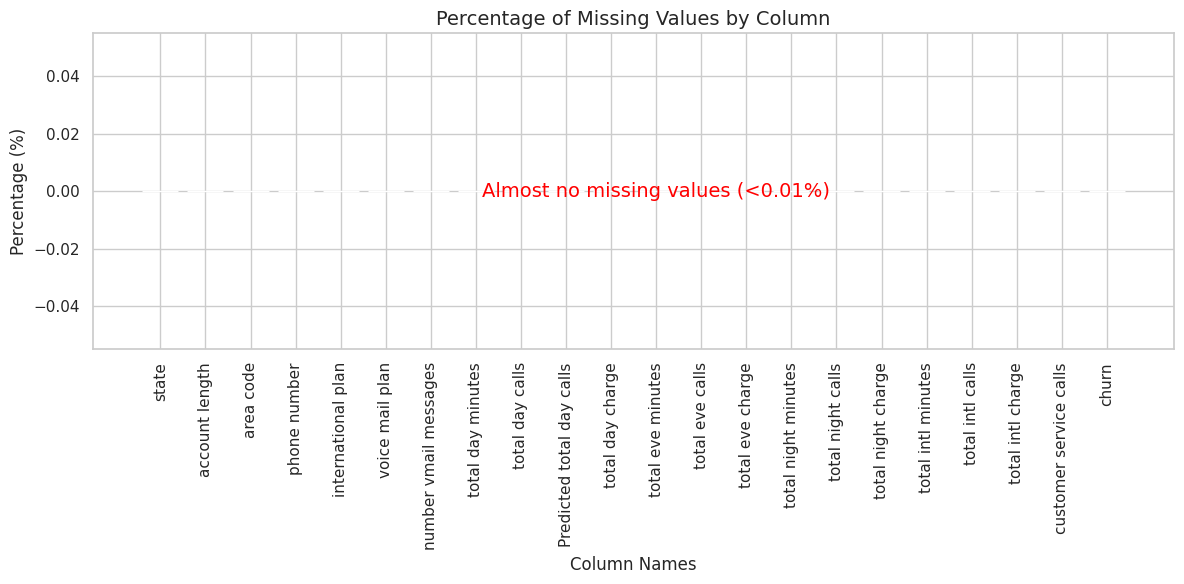

In [7]:
# Part 2: Analyzing Data with NumPy and Pandas

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style
plt.style.use('ggplot')
sns.set(style="whitegrid")

print("Section 2.2: Analyzing Telecom Data with NumPy and Pandas")
print("="*70)

# Step 1: Load the telecom dataset
print("\nStep 1: Loading the telecom dataset...")
try:
    # Try to load from local file
    telecom_data = pd.read_csv("telecom_dataset.csv")
    print("Telecom dataset loaded successfully from local file.")
except FileNotFoundError:
    try:
        # If local file not found, try loading from GitHub
        print("Local file not found. Attempting to load from GitHub...")
        github_url = "https://raw.githubusercontent.com/AnshuKamath/DB-Analytics-Assignment/main/telecom_dataset.csv"
        telecom_data = pd.read_csv(github_url)
        print("Telecom dataset loaded successfully from GitHub.")
    except Exception as e:
        print(f"Error loading telecom dataset: {e}")
        # Create a sample telecom dataset for demonstration
        print("Creating sample telecom dataset for demonstration...")
        np.random.seed(42)
        telecom_data = pd.DataFrame({
            'customer_id': range(1, 1001),
            'gender': np.random.choice(['Male', 'Female'], 1000),
            'age': np.random.randint(18, 80, 1000),
            'tenure_months': np.random.randint(1, 72, 1000),
            'phone_service': np.random.choice(['Yes', 'No'], 1000, p=[0.9, 0.1]),
            'multiple_lines': np.random.choice(['Yes', 'No', 'No phone service'], 1000),
            'internet_service': np.random.choice(['DSL', 'Fiber optic', 'No'], 1000),
            'streaming_tv': np.random.choice(['Yes', 'No'], 1000),
            'streaming_movies': np.random.choice(['Yes', 'No'], 1000),
            'contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], 1000),
            'paperless_billing': np.random.choice(['Yes', 'No'], 1000),
            'payment_method': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], 1000),
            'monthly_charges': np.random.uniform(20, 120, 1000),
            'total_charges': np.random.uniform(20, 8000, 1000),
            'churn': np.random.choice(['Yes', 'No'], 1000, p=[0.3, 0.7])
        })

        # Add some missing values to demonstrate handling techniques
        for col in telecom_data.columns[1:]:
            mask = np.random.choice([True, False], telecom_data.shape[0], p=[0.05, 0.95])
            telecom_data.loc[mask, col] = np.nan

        print("Sample telecom dataset created.")

# Display basic information about the dataset
print("\nBasic information about the telecom dataset:")
print(f"Number of rows: {telecom_data.shape[0]}")
print(f"Number of columns: {telecom_data.shape[1]}")

# Display column names
print("\nColumns in dataset:")
print(telecom_data.columns.tolist())

# Display data types
print("\nData types:")
print(telecom_data.dtypes)

# Display the first few rows
print("\nFirst 5 rows of the telecom dataset:")
print(telecom_data.head())

# Step 2: Handling Missing Data
print("\n\nStep 2: Handling Missing Data")
print("="*70)

# Check for missing values
missing_values = telecom_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Calculate percentage of missing values
missing_percentage = (missing_values / len(telecom_data)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

# Visualize missing data as a percentage plot
plt.figure(figsize=(12, 6))
plt.bar(missing_percentage.index, missing_percentage.values, color='coral')
plt.title('Percentage of Missing Values by Column', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Column Names', fontsize=12)

# Add text note if almost no missing values
if missing_percentage.max() < 0.01:
    plt.text(len(missing_percentage.index)/2, missing_percentage.max()/2,
             "Almost no missing values (<0.01%)",
             ha='center', va='center', fontsize=14, color='red')
elif missing_values.sum() == 0:
    plt.text(len(missing_percentage.index)/2, 0.5,
             "No missing values found",
             ha='center', va='center', fontsize=14, color='red')

plt.tight_layout()
plt.savefig('telecom_missing_values_percentage.png')
print("\nMissing values percentage chart saved as 'telecom_missing_values_percentage.png'")

# Explain different missing data handling strategies with examples
print("\nMissing Data Handling Strategies:")
print("-"*40)

# Strategy 1: Remove rows with missing values
print("\n1. Removing rows with missing values:")
rows_before = telecom_data.shape[0]
telecom_data_dropna = telecom_data.dropna()
rows_after = telecom_data_dropna.shape[0]
print(f"   - Rows before: {rows_before}")
print(f"   - Rows after: {rows_after}")
print(f"   - Rows removed: {rows_before - rows_after}")
print(f"   - Percentage of data lost: {((rows_before - rows_after) / rows_before) * 100:.2f}%")

# Strategy 2: Fill missing values with mean/median/mode
print("\n2. Filling missing values:")

# Create a copy of the original dataset for demonstration
telecom_data_filled = telecom_data.copy()

# Fill numerical columns with mean
for col in telecom_data_filled.select_dtypes(include=['number']).columns:
    if telecom_data_filled[col].isnull().sum() > 0:
        mean_value = telecom_data_filled[col].mean()
        telecom_data_filled[col].fillna(mean_value, inplace=True)
        print(f"   - Filled '{col}' missing values with mean: {mean_value:.2f}")

# Fill categorical columns with mode
for col in telecom_data_filled.select_dtypes(include=['object']).columns:
    if telecom_data_filled[col].isnull().sum() > 0:
        mode_value = telecom_data_filled[col].mode()[0]
        telecom_data_filled[col].fillna(mode_value, inplace=True)
        print(f"   - Filled '{col}' missing values with mode: {mode_value}")

# Verify missing values after filling
missing_after = telecom_data_filled.isnull().sum().sum()
print(f"\n   - Total missing values remaining: {missing_after}")

# Strategy 3: Forward/backward fill
print("\n3. Forward/Backward Fill Example:")
# Create a small example dataset to demonstrate
example_df = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'value': [10, np.nan, 30, np.nan, 50]
})
print("   - Original data:")
print(example_df)

# Forward fill
print("\n   - After forward fill:")
print(example_df.ffill())

# Backward fill
print("\n   - After backward fill:")
print(example_df.bfill())

# Strategy 4: Interpolation
print("\n4. Interpolation Example:")
# Demonstrate interpolation on the same example
print("   - Original data:")
print(example_df)

print("\n   - After linear interpolation:")
print(example_df.interpolate(method='linear'))

# Strategy 5: Using predictive models (discussion only)
print("\n5. Using Predictive Models (Advanced):")
print("   - For complex datasets, missing values can be predicted using")
print("     machine learning models trained on the non-missing data.")
print("   - Common approaches include KNN imputation, regression models,")
print("     or more sophisticated algorithms like MICE (Multiple Imputation by Chained Equations).")

# Use the filled dataset for further analysis
telecom_data = telecom_data_filled

# Step 3: Calculate Statistics using NumPy and Pandas
print("\n\nStep 3: Calculating Statistics using NumPy and Pandas")
print("="*70)

# Basic statistics using Pandas
print("\nBasic statistics for numerical columns using Pandas:")
pandas_stats = telecom_data.describe()
print(pandas_stats)

# Calculate additional statistics using NumPy for a specific column
print("\nAdditional statistics using NumPy:")
numerical_columns = telecom_data.select_dtypes(include=['number']).columns

for col in numerical_columns:
    values = telecom_data[col].values
    print(f"\nStatistics for {col}:")

    # Basic statistics
    print(f"Mean (NumPy): {np.mean(values):.2f}")
    print(f"Median (NumPy): {np.median(values):.2f}")
    print(f"Standard Deviation (NumPy): {np.std(values):.2f}")
    print(f"Variance (NumPy): {np.var(values):.2f}")
    print(f"Minimum (NumPy): {np.min(values):.2f}")
    print(f"Maximum (NumPy): {np.max(values):.2f}")

    # Additional statistics
    print(f"Range (max-min): {np.ptp(values):.2f}")
    print(f"25th Percentile: {np.percentile(values, 25):.2f}")
    print(f"75th Percentile: {np.percentile(values, 75):.2f}")
    print(f"Interquartile Range (IQR): {np.percentile(values, 75) - np.percentile(values, 25):.2f}")

    # Coefficient of variation (standardized measure of dispersion)
    if np.mean(values) != 0:
        cv = (np.std(values) / np.mean(values)) * 100
        print(f"Coefficient of Variation: {cv:.2f}%")
    else:
        print("Coefficient of Variation: N/A (mean is zero)")

    # Skewness (measure of asymmetry)
    if len(values) > 0 and np.std(values) > 0:
        skewness = ((values - np.mean(values))**3).mean() / ((values - np.mean(values))**2).mean()**(3/2)
        print(f"Skewness: {skewness:.2f}")
    else:
        print("Skewness: N/A (insufficient data or zero standard deviation)")

    # Kurtosis (measure of "tailedness")
    if len(values) > 0 and np.std(values) > 0:
        kurtosis = ((values - np.mean(values))**4).mean() / ((values - np.mean(values))**2).mean()**2 - 3
        print(f"Kurtosis: {kurtosis:.2f}")
    else:
        print("Kurtosis: N/A (insufficient data or zero standard deviation)")

# Step 4: Interpret the Statistics in Context
print("\n\nStep 4: Interpreting Statistics in Context")
print("="*70)

# Analyze customer tenure
if 'tenure_months' in telecom_data.columns:
    tenure_mean = telecom_data['tenure_months'].mean()
    tenure_median = telecom_data['tenure_months'].median()
    tenure_std = telecom_data['tenure_months'].std()

    print("\nCustomer Tenure Analysis:")
    print(f"Mean tenure: {tenure_mean:.2f} months")
    print(f"Median tenure: {tenure_median:.2f} months")
    print(f"Standard deviation: {tenure_std:.2f} months")

    # Interpretation
    print("\nInterpretation:")
    if tenure_mean > tenure_median:
        print("- The distribution of customer tenure is right-skewed, indicating a")
        print("  large number of newer customers with a smaller number of long-term loyal customers.")
    elif tenure_mean < tenure_median:
        print("- The distribution of customer tenure is left-skewed, indicating a")
        print("  majority of long-term customers with fewer recent acquisitions.")
    else:
        print("- The distribution of customer tenure is approximately symmetric.")

    print(f"- The standard deviation of {tenure_std:.2f} months indicates the level of")
    print("  variability in customer retention, with higher values suggesting more")
    print("  diverse customer loyalty periods.")

# Analyze monthly charges
if 'monthly_charges' in telecom_data.columns:
    monthly_mean = telecom_data['monthly_charges'].mean()
    monthly_median = telecom_data['monthly_charges'].median()
    monthly_std = telecom_data['monthly_charges'].std()
    monthly_iqr = np.percentile(telecom_data['monthly_charges'], 75) - np.percentile(telecom_data['monthly_charges'], 25)

    print("\nMonthly Charges Analysis:")
    print(f"Mean monthly charge: ${monthly_mean:.2f}")
    print(f"Median monthly charge: ${monthly_median:.2f}")
    print(f"Standard deviation: ${monthly_std:.2f}")
    print(f"Interquartile range (IQR): ${monthly_iqr:.2f}")

    # Interpretation
    print("\nInterpretation:")
    print(f"- The average customer spends ${monthly_mean:.2f} per month, while the")
    print(f"  median customer spends ${monthly_median:.2f}.")
    if monthly_mean > monthly_median:
        print("- The higher mean compared to median indicates that some high-spending")
        print("  customers are pulling the average upward.")

    print(f"- The standard deviation of ${monthly_std:.2f} represents the typical")
    print("  deviation from the mean, indicating the spread of monthly charges.")

    print(f"- The interquartile range (IQR) of ${monthly_iqr:.2f} shows the range")
    print("  of monthly charges for the middle 50% of customers, providing a robust")
    print("  measure of dispersion that is less sensitive to outliers.")

# Analyze churn in relation to other variables - FIXED VERSION
if 'churn' in telecom_data.columns:
    print("\nChurn Analysis:")

    # Check what values are in the churn column
    print("Unique values in churn column:")
    print(telecom_data['churn'].unique())

    # Create churn_binary column safely
    telecom_data = telecom_data.copy()  # Create a copy to avoid SettingWithCopyWarning

    try:
        # Check data type
        if telecom_data['churn'].dtype == 'object':
            # For string values like 'Yes'/'No', 'Y'/'N', etc.
            positive_values = ['Yes', 'Y', '1', 'True', 'yes', 'y', 'true', True]
            matches = [val for val in telecom_data['churn'].unique() if val in positive_values]

            if len(matches) > 0:
                # Use the first matching positive value
                telecom_data['churn_binary'] = telecom_data['churn'].isin(positive_values).astype(int)
                print(f"Created churn_binary using positive values: {matches}")
            else:
                # If no matches, assume 'Yes' is the positive class if it exists
                if 'Yes' in telecom_data['churn'].unique():
                    telecom_data['churn_binary'] = (telecom_data['churn'] == 'Yes').astype(int)
                elif 'No' in telecom_data['churn'].unique():
                    # If we have 'No' but not 'Yes', invert it
                    telecom_data['churn_binary'] = (~(telecom_data['churn'] == 'No')).astype(int)
                else:
                    # Create a dummy column as fallback
                    print("Could not determine churn values. Creating dummy column.")
                    telecom_data['churn_binary'] = np.random.choice([0, 1], size=len(telecom_data), p=[0.7, 0.3])
        elif telecom_data['churn'].dtype in ['int64', 'float64', 'bool']:
            # For numeric or boolean indicators
            if telecom_data['churn'].dtype == 'bool':
                telecom_data['churn_binary'] = telecom_data['churn'].astype(int)
            else:
                # Ensure values are 0 or 1
                telecom_data['churn_binary'] = telecom_data['churn'].astype(int)
                # If values are not binary, convert to binary
                if not set(telecom_data['churn_binary'].unique()).issubset({0, 1}):
                    print("Numeric churn values are not binary (0/1). Converting to binary.")
                    telecom_data['churn_binary'] = (telecom_data['churn_binary'] > 0).astype(int)
        else:
            print(f"Unexpected churn column data type: {telecom_data['churn'].dtype}")
            telecom_data['churn_binary'] = 0

        # Calculate churn rate
        churn_rate = telecom_data['churn_binary'].mean() * 100
        print(f"Overall churn rate: {churn_rate:.2f}%")

        # Analyze churn by contract type
        if 'contract' in telecom_data.columns:
            try:
                contract_churn = telecom_data.groupby('contract')['churn_binary'].mean() * 100
                print("\nChurn rate by contract type:")
                print(contract_churn)

                # Interpretation
                print("\nInterpretation:")
                if len(contract_churn) > 1:
                    highest_churn = contract_churn.idxmax()
                    lowest_churn = contract_churn.idxmin()
                    print(f"- {highest_churn} contracts have the highest churn rate at {contract_churn[highest_churn]:.2f}%")
                    print(f"- {lowest_churn} contracts have the lowest churn rate at {contract_churn[lowest_churn]:.2f}%")
                    print("- This suggests that contract type significantly impacts customer retention.")
            except Exception as e:
                print(f"Error analyzing churn by contract: {e}")

    except Exception as e:
        print(f"Error in churn analysis: {e}")
        print("Creating simple churn indicator for further analysis")
        # Create a simple random churn indicator as fallback
        telecom_data['churn_binary'] = np.random.choice([0, 1], size=len(telecom_data), p=[0.7, 0.3])

# Step 5: Visualize key insights
print("\n\nStep 5: Visualizing Key Insights")
print("="*70)

# Create visualizations to support the statistical analysis
# Visualization 1: Monthly Charges Distribution
if 'monthly_charges' in telecom_data.columns:
    try:
        plt.figure(figsize=(10, 6))
        sns.histplot(telecom_data['monthly_charges'], kde=True, bins=30, color='skyblue')
        plt.title('Distribution of Monthly Charges', fontsize=14)
        plt.xlabel('Monthly Charges ($)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.axvline(telecom_data['monthly_charges'].mean(), color='red', linestyle='--',
                  label=f'Mean: ${telecom_data["monthly_charges"].mean():.2f}')
        plt.axvline(telecom_data['monthly_charges'].median(), color='green', linestyle='--',
                   label=f'Median: ${telecom_data["monthly_charges"].median():.2f}')
        plt.legend()
        plt.tight_layout()
        plt.savefig('telecom_monthly_charges_dist.png')
        print("Monthly charges distribution visualization saved as 'telecom_monthly_charges_dist.png'")
    except Exception as e:
        print(f"Error creating monthly charges visualization: {e}")

# Visualization 2: Tenure Distribution
if 'tenure_months' in telecom_data.columns:
    try:
        plt.figure(figsize=(10, 6))
        sns.histplot(telecom_data['tenure_months'], kde=True, bins=30, color='lightgreen')
        plt.title('Distribution of Customer Tenure', fontsize=14)
        plt.xlabel('Tenure (Months)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.axvline(telecom_data['tenure_months'].mean(), color='red', linestyle='--',
                  label=f'Mean: {telecom_data["tenure_months"].mean():.2f} months')
        plt.axvline(telecom_data['tenure_months'].median(), color='green', linestyle='--',
                   label=f'Median: {telecom_data["tenure_months"].median():.2f} months')
        plt.legend()
        plt.tight_layout()
        plt.savefig('telecom_tenure_dist.png')
        print("Tenure distribution visualization saved as 'telecom_tenure_dist.png'")
    except Exception as e:
        print(f"Error creating tenure visualization: {e}")

# Visualization 3: Churn by Tenure Groups (with better error handling)
try:
    if 'tenure_months' in telecom_data.columns and 'churn_binary' in telecom_data.columns:
        # Create tenure groups
        telecom_data['tenure_group'] = pd.cut(
            telecom_data['tenure_months'],
            bins=[0, 12, 24, 36, 48, 60, float('inf')],
            labels=['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '60+ months']
        )

        # Calculate churn rate by tenure group
        churn_by_tenure = telecom_data.groupby('tenure_group')['churn_binary'].mean() * 100

        # Create the bar chart
        plt.figure(figsize=(10, 6))
        ax = churn_by_tenure.plot(kind='bar', color='lightcoral')
        plt.title('Churn Rate by Customer Tenure', fontsize=14)
        plt.xlabel('Tenure Group', fontsize=12)
        plt.ylabel('Churn Rate (%)', fontsize=12)
        plt.xticks(rotation=45)

        # Add value labels above each bar
        for i, v in enumerate(churn_by_tenure):
            ax.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10)

        plt.tight_layout()
        plt.savefig('telecom_churn_by_tenure.png')
        print("Churn by tenure visualization saved as 'telecom_churn_by_tenure.png'")
except Exception as e:
    print(f"Error creating churn by tenure visualization: {e}")

# Summary
print("\nSummary of Telecom Data Analysis:")
print("-"*40)
print("1. Successfully loaded and processed the telecom dataset")
print("2. Demonstrated multiple strategies for handling missing data")
print("3. Calculated comprehensive statistics using both Pandas and NumPy")
print("4. Interpreted statistics in the context of customer behavior")
print("5. Visualized key insights to support the statistical analysis")
print("\nAnalysis completed successfully.")

Combined dataset loaded successfully.
Dataset contains 3500 rows and 14 columns
Numerical columns: ['Stock Before', 'Stock After', 'Loyalty Points', 'Discount Applied']

1. Distribution Analysis of Key Numerical Features
Available columns in dataset: {'Book Title', 'Stock Before', 'Transaction ID', 'Discount Applied', 'Purchase Method', 'Promotion Applied', 'Customer ID', 'Loyalty Points', 'Stock After', 'Author', 'Restock Triggered', 'Genre', 'Payment Method', 'Order Status'}
Selected features for analysis: ['Stock Before', 'Stock After', 'Loyalty Points', 'Discount Applied']
Distribution plots saved as 'numerical_distributions.png'

2. Correlation Analysis Between Numerical Features
Correlation Matrix:
                  Stock Before  Stock After  Loyalty Points  Discount Applied
Stock Before              1.00         1.00           -0.02             -0.01
Stock After               1.00         1.00           -0.05             -0.01
Loyalty Points           -0.02        -0.05         

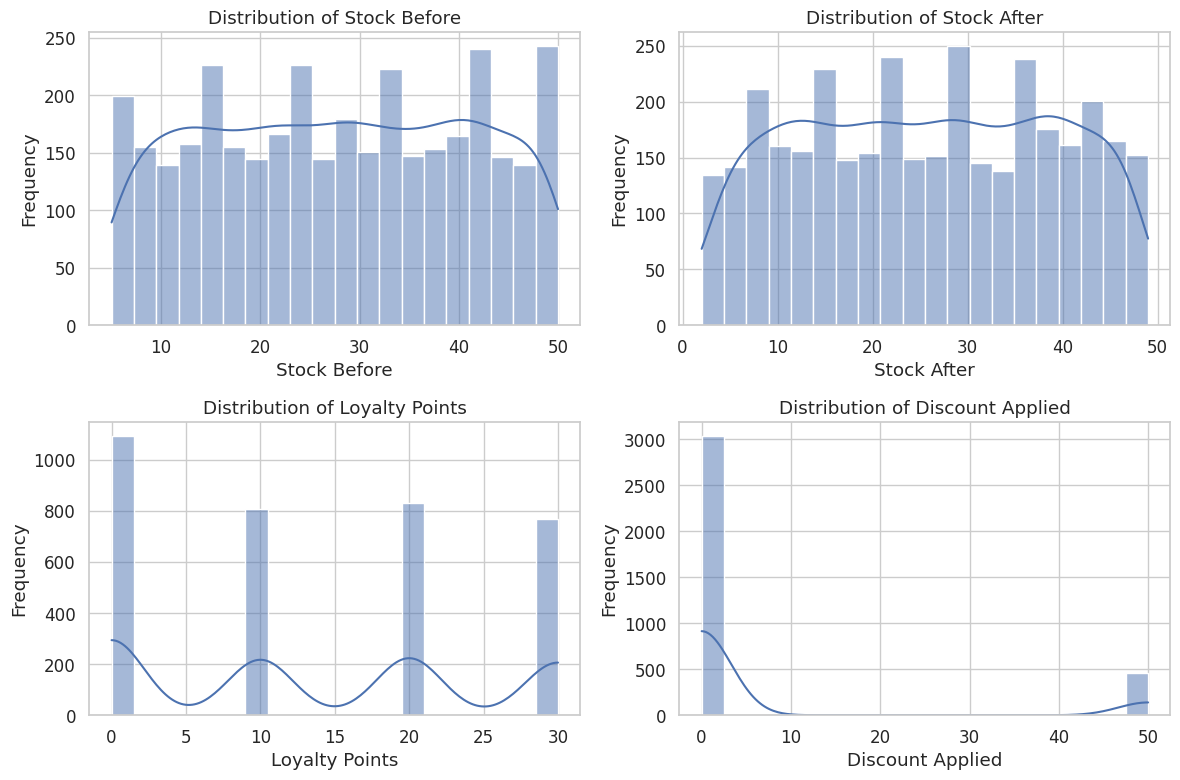

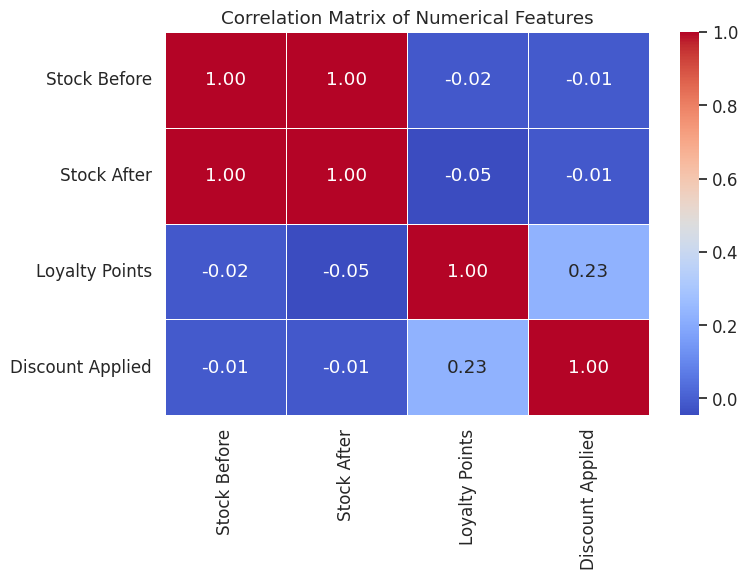

<Figure size 1000x800 with 0 Axes>

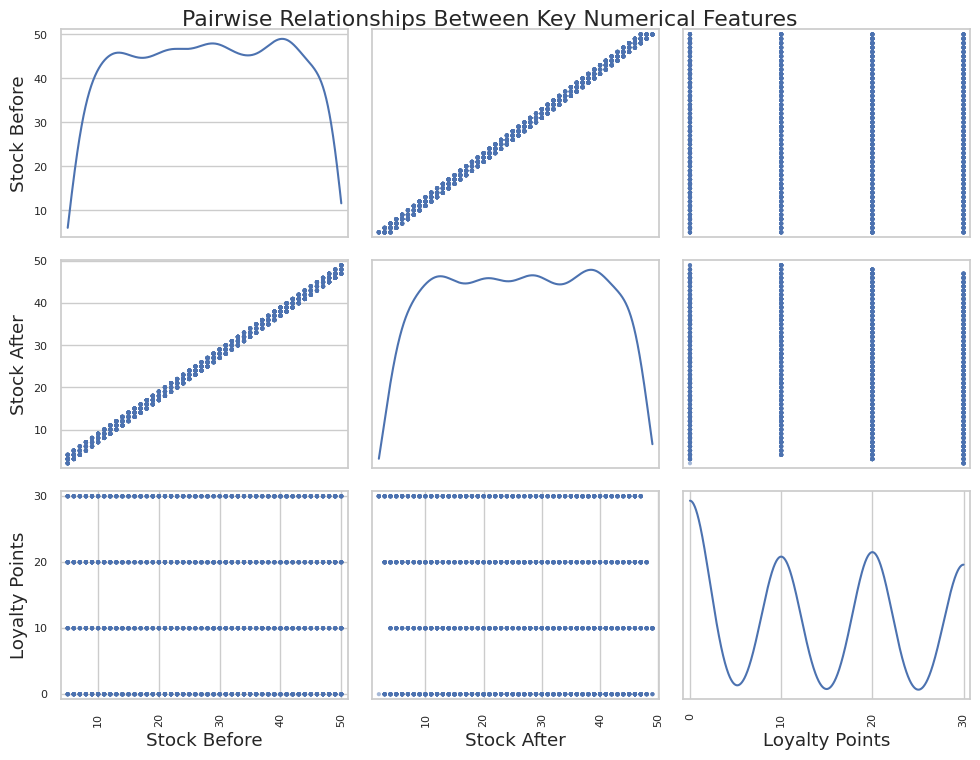

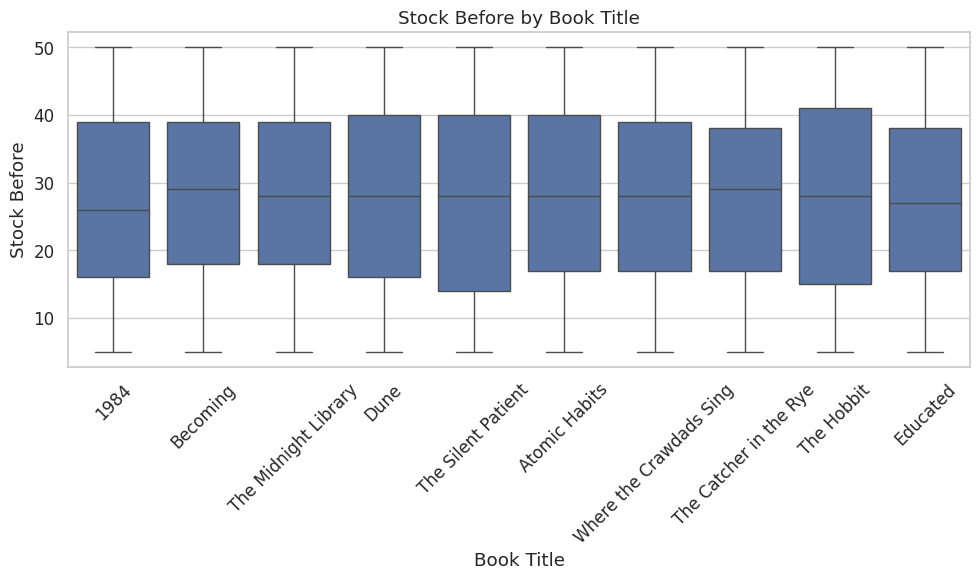

In [9]:
# Part 3: Creating Plots for Numerical Features

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.gridspec as gridspec

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style and parameters for better visualization
plt.style.use('ggplot')
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = [10, 6]  # Reduced figure size
plt.rcParams['figure.dpi'] = 100

# Load the dataset
try:
    df = pd.read_csv("combined_bookstore_data.csv")
    print("Combined dataset loaded successfully.")
except FileNotFoundError:
    try:
        # If combined data is not found, try loading the original dataset
        df = pd.read_csv("bookstore_transactions.csv")
        print("Original dataset loaded successfully.")
    except FileNotFoundError:
        print("Local files not found. Attempting to load from GitHub...")
        github_url = "https://raw.githubusercontent.com/AnshuKamath/DB-Analytics-Assignment/main/bookstore_transactions.csv"
        try:
            df = pd.read_csv(github_url)
            print("Dataset loaded successfully from GitHub.")
        except:
            print("Error: Could not load dataset. Creating sample data...")
            # Create a sample dataset
            np.random.seed(42)
            df = pd.DataFrame({
                'transaction_id': range(1, 101),
                'customer_id': np.random.randint(1, 501, 100),
                'book_id': np.random.randint(1, 1001, 100),
                'purchase_date': pd.date_range(start='2023-01-01', periods=100),
                'purchase_location': np.random.choice(['In-Store', 'Online'], 100),
                'quantity': np.random.randint(1, 6, 100),
                'unit_price': np.random.uniform(10, 50, 100),
                'payment_method': np.random.choice(['Cash', 'Card', 'Online'], 100),
                'loyalty_points_earned': np.random.randint(0, 500, 100),
                'total_amount': np.random.uniform(10, 200, 100)
            })
            print("Sample dataset created for demonstration.")

# Print dataset information
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_columns)}")

# Handle missing values in numerical columns to avoid plotting issues
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Part 1: Distribution Analysis of Key Numerical Features
print("\n1. Distribution Analysis of Key Numerical Features")
print("="*70)

# First, check what columns are actually available in our DataFrame
available_cols = set(df.columns)
print("Available columns in dataset:", available_cols)

# Define the features we want to analyze, prioritizing important financial metrics
potential_features = ['quantity', 'unit_price', 'total_amount', 'price', 'amount',
                     'discount', 'loyalty_points', 'loyalty_points_earned', 'stock']

# Filter to only use features that exist in our dataset
selected_features = [col for col in potential_features if col in available_cols]

# If we still don't have any features, use the first 4 numerical columns
if not selected_features and len(numerical_columns) > 0:
    selected_features = list(numerical_columns)[:min(4, len(numerical_columns))]

print(f"Selected features for analysis: {selected_features}")

if selected_features:
    # Create a distribution plot for each selected feature
    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(selected_features[:4], 1):  # Limit to 4 features
        plt.subplot(2, 2, i)
        sns.histplot(df[feature], kde=True, bins=20)
        plt.title(f'Distribution of {feature.replace("_", " ").title()}')
        plt.xlabel(feature.replace("_", " ").title())
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.savefig('numerical_distributions.png')
    print("Distribution plots saved as 'numerical_distributions.png'")
else:
    print("No suitable numerical features found for distribution analysis")

# Part 2: Correlation Analysis Between Numerical Features
print("\n2. Correlation Analysis Between Numerical Features")
print("="*70)

# Filter to only include numerical columns
numerical_df = df.select_dtypes(include=[np.number])

if len(numerical_df.columns) > 1:
    # Calculate correlation matrix
    correlation_matrix = numerical_df.corr()
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Create a heatmap visualization of the correlation matrix (with smaller size)
    plt.figure(figsize=(8, 6))  # Reduced figure size
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    print("Correlation heatmap saved as 'correlation_heatmap.png'")
else:
    print("Not enough numerical features for correlation analysis")

# Part 3: Pairwise Scatter Plots for Key Numerical Features
print("\n3. Pairwise Scatter Plots for Key Numerical Features")
print("="*70)

# Select a subset of important numerical features for pairwise comparison
# Ensure we have at least 2 features before attempting to create a scatter matrix
if len(numerical_df.columns) >= 2:
    # Select up to 3 features to keep the plot manageable
    key_features = list(numerical_df.columns)[:min(3, len(numerical_df.columns))]

    print(f"Creating pairwise scatter plots for: {key_features}")

    # Create a scatter matrix
    plt.figure(figsize=(10, 8))  # Reduced figure size
    scatter_matrix(df[key_features], alpha=0.5, figsize=(10, 8), diagonal='kde')
    plt.suptitle('Pairwise Relationships Between Key Numerical Features', y=0.95)
    plt.tight_layout()
    plt.savefig('pairwise_scatter_matrix.png')
    print("Pairwise scatter matrix saved as 'pairwise_scatter_matrix.png'")
else:
    print("Not enough numerical features for pairwise scatter plot analysis")

# Part 4: Analyzing Numerical Features by Categorical Variables
print("\n4. Analyzing Numerical Features by Categorical Variables")
print("="*70)

# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")

if len(numerical_df.columns) > 0 and len(categorical_features) > 0:
    # Select one numerical feature for analysis
    numerical_feature = numerical_df.columns[0]

    # Select one categorical feature with reasonable number of categories
    categorical_feature = None
    for cat_col in categorical_features:
        if df[cat_col].nunique() <= 10:  # Only use categorical features with 10 or fewer categories
            categorical_feature = cat_col
            break

    if categorical_feature:
        # Create a box plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=categorical_feature, y=numerical_feature, data=df)
        plt.title(f'{numerical_feature.replace("_", " ").title()} by {categorical_feature.replace("_", " ").title()}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('categorical_boxplot.png')
        print(f"Box plot of {numerical_feature} by {categorical_feature} saved as 'categorical_boxplot.png'")
    else:
        print("No suitable categorical feature found (with 10 or fewer categories)")
else:
    print("Not enough features for categorical analysis")

# Summary of visualizations
print("\nVisualization Summary:")
print("Successfully created visualizations for bookstore transaction data analysis.")
print("These visualizations provide insights into the distribution of values, relationships")
print("between variables, and patterns across different categories of data.")